                  AAPL         CVX         KO         JNJ          PG
Date                                                                 
2022-05-02  156.175262  148.305588  59.712139  168.743378  150.453339
2022-05-03  157.678101  150.849274  59.373302  168.412750  148.391968
2022-05-04  164.144211  155.583923  61.208706  170.216949  149.484390
2022-05-05  154.998749  154.349197  60.719273  166.967514  146.729538
2022-05-06  155.731430  158.461838  60.935757  166.599136  148.192459


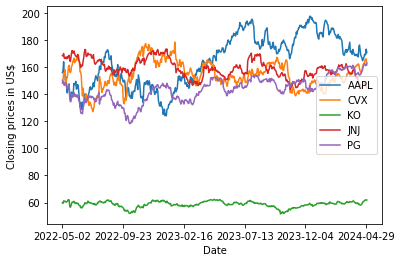

In [2]:
#getting data from yahoofinance for AAPL, CVX, KO, JNJ and PG
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm



ticker_symbol_1 = 'AAPL'
ticker_symbol_2 = 'CVX'
ticker_symbol_3 = 'KO'
ticker_symbol_4 = 'JNJ'
ticker_symbol_5 = 'PG'

appl = yf.Ticker(ticker_symbol_1)
cvx = yf.Ticker(ticker_symbol_2)
ko = yf.Ticker(ticker_symbol_3)
jnj = yf.Ticker(ticker_symbol_4)
pg = yf.Ticker(ticker_symbol_5)

historical_data_appl = appl.history(period="2y")
historical_data_cvx = cvx.history(period="2y")
historical_data_ko = ko.history(period="2y")
historical_data_jnj = jnj.history(period="2y")
historical_data_pg = pg.history(period="2y")

daily_prices_aapl = historical_data_appl[['Close']]
daily_prices_cvx = historical_data_cvx[['Close']]
daily_prices_ko = historical_data_ko[['Close']]
daily_prices_jnj = historical_data_jnj[['Close']]
daily_prices_pg = historical_data_pg[['Close']]

combined_prices = pd.concat([daily_prices_aapl, daily_prices_cvx, daily_prices_ko, daily_prices_jnj, daily_prices_pg], axis=1)

# Convert the index to a string format (YYYY-MM-DD)
combined_prices.index = combined_prices.index.strftime('%Y-%m-%d')

#renaming colum "Close" into corresponding tickers
# Rename columns
tickers = ['AAPL', 'CVX', 'KO', 'JNJ', 'PG']
combined_prices.columns = tickers

# Display the transformed data frame
print(combined_prices.head())


#creating a plot for visualisation
combined_prices.plot().set_ylabel("Closing prices in US$")
plt.show()

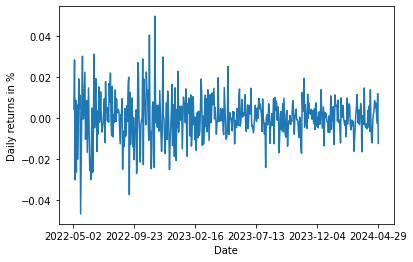

In [3]:
#Compute daily asset returns 
daily_returns = combined_prices.pct_change()

#creating a list for portfolio weights
weights = [0.4, 0.2, 0.1, 0.15, 0.15]


#defining portfolio returns as a product of weights and daily returns - dot
portfolio_returns = daily_returns.dot(weights)

#plotting portfolio returns
portfolio_returns.plot().set_ylabel("Daily returns in %")
plt.show()


In [4]:
#Generate the covariance matrix from the portfolio daily returns
covariance = daily_returns.cov()
#annulize the covariance using 252 days per year
covariance_annulized = covariance * 252
print(covariance_annulized)

          AAPL       CVX        KO       JNJ        PG
AAPL  0.076469  0.021519  0.018717  0.011646  0.017153
CVX   0.021519  0.070806  0.010142  0.006701  0.004603
KO    0.018717  0.010142  0.025318  0.011793  0.018601
JNJ   0.011646  0.006701  0.011793  0.025432  0.011970
PG    0.017153  0.004603  0.018601  0.011970  0.030413


In [27]:
##this is all nonsense for VaR and not really needed lol

#Converting daily returns into quarterly and weekly minimum returns

daily_returns.index = pd.to_datetime(daily_returns.index)
returns_q = daily_returns.resample('Q').mean()
print(returns_q.head(5))
returns_w = daily_returns.resample('W').min()
print(returns_w.head(5))

                AAPL       CVX        KO       JNJ        PG
Date                                                        
2022-06-30 -0.003097 -0.001883  0.000115  0.000071 -0.002201
2022-09-30  0.000373  0.000243 -0.001642 -0.001142 -0.001833
2022-12-31 -0.000638  0.003834  0.002197  0.001388  0.003072
2023-03-31  0.003991 -0.001263 -0.000242 -0.001943 -0.000157
2023-06-30  0.002709 -0.000329 -0.000334  0.001225  0.000470
                AAPL       CVX        KO       JNJ        PG
Date                                                        
2022-05-08 -0.055716 -0.007936 -0.007996 -0.019090 -0.018429
2022-05-15 -0.051841 -0.067022 -0.009287 -0.005734 -0.014084
2022-05-22 -0.056419 -0.026360 -0.069626 -0.018566 -0.062322
2022-05-29 -0.019216  0.005358  0.000781 -0.009812 -0.016392
2022-06-05 -0.038556 -0.020305 -0.020099 -0.010138 -0.015147


95% VaR:  1.6448536269514722 ; 99% VaR:  2.3269961767426035


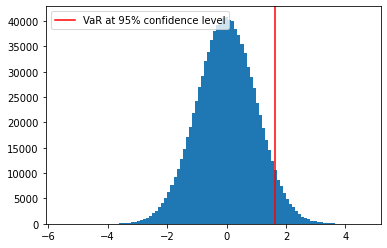

In [5]:
#lets start with VaR when losses are normally distributed
#creating a VaR measure at 95% confidence level
VaR_95 = norm.ppf(0.95)
#create a vAR mesure at the 5% significance level using numpy.quantile()
draws = norm.rvs(size = 1000000)
VaR_99 = np.quantile(draws, 0.99)

#compare the 95% VaR and 99% VaR
print ("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

#plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% confidence level")
plt.legend();
plt.show()

In [6]:
#let us compute the mean and the variance of the portfolio returns
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

VaR at 95% confidence level: 0.017387735810759697
The mean of the portfolio: 0.00020256139380253315
The std dev of the portfolio: 0.010447844194384461


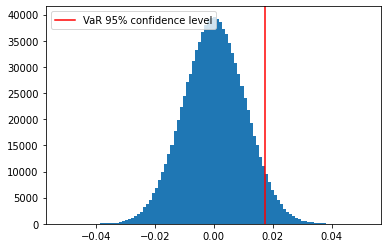

In [7]:
VaR_95 = norm.ppf(0.95, loc=portfolio_mean, scale=portfolio_std)
print("VaR at 95% confidence level:", VaR_95)
print("The mean of the portfolio:", portfolio_mean)
print("The std dev of the portfolio:",portfolio_std)


#lets do some plots
plt.hist(norm.rvs(size=1000000, loc=portfolio_mean, scale=portfolio_std), bins=100)
plt.axvline (x = VaR_95, c= 'r', label = "VaR 95% confidence level")
plt.legend();
plt.show()

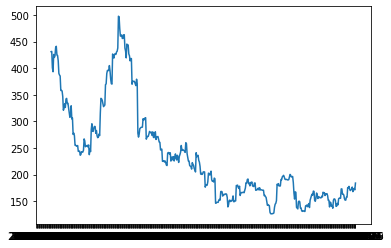

VaR at 99% confidence level: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.04310295 0.04314454 0.04008857 0.039323   0.0425739  0.04201584
 0.04230516 0.04385527 0.04410768 0.04246595 0.04238355 0.04138646
 0.03901481 0.03871161 0.03852223 0.03580699 0.03582409 0.03570726
 0.03467042 0.03209605 0.03252005 0.03330206 0.03262131 0.03419731
 0.03431784 0.0333521  0.03341684 0.03255704 0.03181594 0.03076071
 0.03105325 0.03292849 0.03046546 0.03063302 0.02754865 0.02779754
 0.0273372  0.02550214 0.02550588 0.02536967 0.02531452 0.02546177
 0.02436129 0.02437642 0.02442174 0.02363662 0.02377896 0.02430428
 0.02423796 0.02423285 0.02457845 0.02670528 0.02634267 0.02523048
 0.02540567 0.02539078 0.02550342

In [50]:
#what if losses are not normally distrubted
#lets try T-distribution
from scipy.stats import t
#creating rolling window parameter lists
mu = portfolio_returns.rolling(30).mean()
sigma = portfolio_returns.rolling(30).std()
rolling_parameters = [(29, mu[i], s) for i, s in enumerate(sigma)]

#compute the 99% VaR array using a rolling window parameter
VaR_99 = np.array( [ t.ppf(0.99, *params)
                   for params in rolling_parameters])
#plot the min. risk exposure
plt.plot(portfolio_returns.index, 0.01*VaR_99 *1000000)
plt.show()
print("VaR at 99% confidence level:", VaR_99)